## Pandas

###  (1) Creating DataFrames

In [5]:
import pandas as pd 

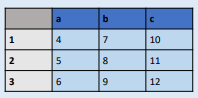

In [16]:
## Specify values for each column.
df1 = pd.DataFrame(
    {"a":[4, 5, 6], 
     "b":[7, 8, 9], 
     "c":[10, 11, 12]}, 
     index = [1, 2, 3]
     )

In [17]:
## Specify values for each row.
df1 = pd.DataFrame(
    [[4, 7, 10], 
     [5, 8, 11], 
     [6, 9, 12]], 
     index = [1, 2, 3], 
     columns = ['a', 'b', 'c'])

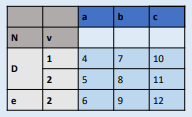

In [15]:
## Create DataFrame with a MultiIndex

df2 = pd.DataFrame(
    {"a": [4, 5, 6], 
     "b" : [7, 8, 9], 
     "c" : [10, 11, 12]}, 

     index = pd.MultiIndex.from_tuples([('d', 1), ('d', 2), ('e', 3)], names = ['n', 'v']))
     

In [19]:
df2

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 3  6  9  12

### (2) Reshaping Data
* change layout
* sorting 
* reindexing
* renaming

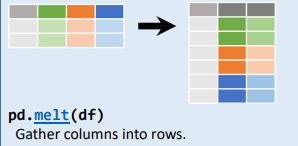

In [33]:
# Gather columns into rows.
pd.melt(df1)

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [32]:
melted_df = pd.melt(df2)

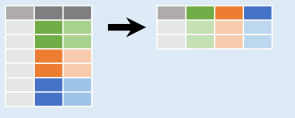

In [28]:
# Spread rows into columns.
melted_df.pivot(columns = 'variable', values = 'value')

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


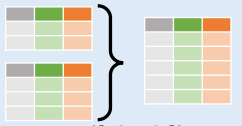

In [34]:
# Append rows of DataFrames

df1 = pd.DataFrame(
    [[4, 7, 10], 
     [5, 8, 11], 
     [6, 9, 12]], 
     index = [1, 2, 3], 
     columns = ['a', 'b', 'c'])

df2 = pd.DataFrame(
    [[14, 17, 110], 
     [15, 18, 111], 
     [16, 19, 112]], 
     index = [1, 2, 3], 
     columns = ['a', 'b', 'c'])

pd.concat([df1, df2])

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
1,14,17,110
2,15,18,111
3,16,19,112


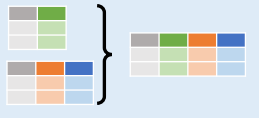

In [35]:
# Append columns of DataFrames
pd.concat([df1, df2], axis = 1)

,a,b,c,a,b,c
1,4,7,10,14,17,110
2,5,8,11,15,18,111
3,6,9,12,16,19,112


In [42]:
# Order rows by values of a column (low to high).
df1.sort_values('a')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [43]:
# Order rows by values of a column (high to low).
df1.sort_values('b', ascending = False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [44]:
## Rename the columns of a DataFrame
df1.rename(columns = {'a':'A'})


,A,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [46]:
# Sort the index of a DataFrame
df1.sort_index()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [47]:
# Reset index of DataFrame to row numbers, moving index to columns.
df1.reset_index()

,index,a,b,c
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [49]:
# Drop columns from DataFrame
df1.drop(columns = ['a'])

,b,c
1,7,10
2,8,11
3,9,12


### (3) Subset Observations - rows


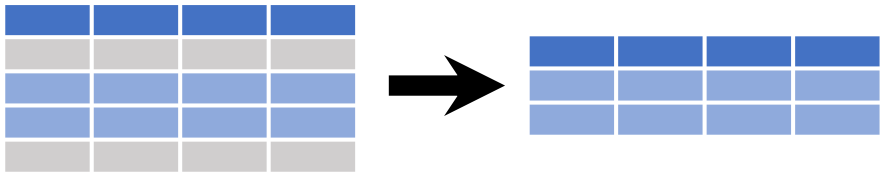

In [58]:
df1[df]

,a,b,c
2,5,8,11
3,6,9,12


In [118]:
# Extract rows that meet logical criteria.
df1[df1.a > 5]

,a,b,c,d
3,6,9,12,14
4,6,9,12,14


In [69]:
# Remove duplicate rows (only considers columns).
df1 = pd.DataFrame(
    [[4, 7, 10, 12], 
     [5, 8, 11, 19], 
     [6, 9, 12, 14],
     [6, 9, 12, 14]], 
     index = [1, 2, 3, 4], 
     columns = ['a', 'b', 'c', 'd'])

print(df1)
df1.drop_duplicates()

   a  b   c   d
1  4  7  10  12
2  5  8  11  19
3  6  9  12  14
4  6  9  12  14


,a,b,c,d
1,4,7,10,12
2,5,8,11,19
3,6,9,12,14


In [73]:
# Randomly select fraction of rows. 
df1.sample(frac = 0.5)

,a,b,c,d
2,5,8,11,19
1,4,7,10,12


In [77]:
# Randomly select n rows.
df1.sample(n=2)

,a,b,c,d
1,4,7,10,12
2,5,8,11,19


In [83]:
# Select and order top n entries.
df1.nlargest(2, 'a')


,a,b,c,d
3,6,9,12,14
4,6,9,12,14


In [84]:
# Select and order bottom n entries.
df1.nsmallest(2, 'a')


,a,b,c,d
1,4,7,10,12
2,5,8,11,19


In [85]:
# Select first n rows.
df1.head(2)


,a,b,c,d
1,4,7,10,12
2,5,8,11,19


In [86]:
# Select last n rows 
df1.tail(2)

,a,b,c,d
3,6,9,12,14
4,6,9,12,14




---



### (4) Subset Variables - columns

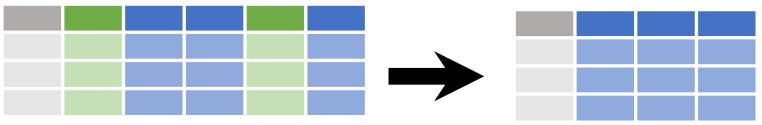

In [87]:
# Select multiple columns with specific names.
df1[['a', 'b']]

,a,b
1,4,7
2,5,8
3,6,9
4,6,9


In [89]:
# Select single column with specific name.
print(df1['a'])

print(df1.a)

1    4
2    5
3    6
4    6
Name: a, dtype: int64
1    4
2    5
3    6
4    6
Name: a, dtype: int64


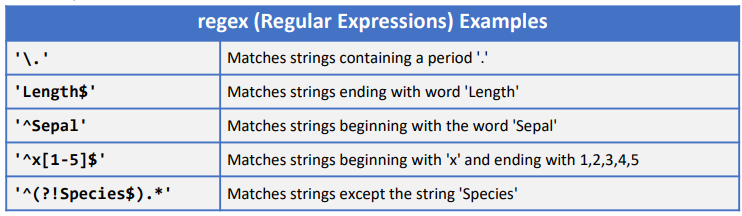

In [90]:
# Select columns whose name matches regular expression regex.
df1.filter(regex ='\a')

""
1
2
3
4




---



### (5) Subsets - rows and columns

In [137]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
df = pd.read_csv(csv_url, names = col_names)

In [138]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
df.iloc[10:20]

,0,1,2,3,4
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


In [99]:
# Select columns in positions 1, 2 and 5 (first column is 0).
df.iloc[:, [1, 2, 4]]


,1,2,4
0,3.5,1.4,Iris-setosa
1,3.0,1.4,Iris-setosa
2,3.2,1.3,Iris-setosa
3,3.1,1.5,Iris-setosa
4,3.6,1.4,Iris-setosa
...,...,...,...
145,3.0,5.2,Iris-virginica
146,2.5,5.0,Iris-virginica
147,3.0,5.2,Iris-virginica
148,3.4,5.4,Iris-virginica


In [100]:
# Select all columns between x2 and x4 (inclusive).
df.loc[:, '2':'4']

,2,3,4
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [110]:
# Select rows meeting logical condition, and only the specific columns .
df.loc[df[2] > 3, [2, 4]]


,2,4
50,4.7,Iris-versicolor
51,4.5,Iris-versicolor
52,4.9,Iris-versicolor
53,4.0,Iris-versicolor
54,4.6,Iris-versicolor
...,...,...
145,5.2,Iris-virginica
146,5.0,Iris-virginica
147,5.2,Iris-virginica
148,5.4,Iris-virginica


In [115]:
 # Access single value by index
 df1.iat[1, 2]

11

In [117]:
# Access single value by label 
df1.at[2, 'a']

5

In [114]:
df1

,a,b,c,d
1,4,7,10,12
2,5,8,11,19
3,6,9,12,14
4,6,9,12,14


### (6) Summarize Data

In [123]:
df1

,a,b,c,d
1,4,7,10,12
2,5,8,11,19
3,6,9,12,14
4,6,9,12,14


In [122]:
# Count number of rows with each unique value of variable
df1['a'].value_counts()

6    2
4    1
5    1
Name: a, dtype: int64

In [124]:
# number of rows in DataFrame.

len(df1)

4

In [126]:
#Tuple of # of rows, # of columns in DataFrame.

df1.shape

(4, 4)

In [127]:
# number of distinct values in a column.
df1['a'].nunique()

3

In [128]:
# Basic descriptive and statistics for each column (or GroupBy).
df1.describe()

,a,b,c,d
count,4.000000,4.000000,4.000000,4.000000
mean,5.250000,8.250000,11.250000,14.750000
std,0.957427,0.957427,0.957427,2.986079
min,4.000000,7.000000,10.000000,12.000000
25%,4.750000,7.750000,10.750000,13.500000
50%,5.500000,8.500000,11.500000,14.000000
75%,6.000000,9.000000,12.000000,15.250000
max,6.000000,9.000000,12.000000,19.000000


* sum() : Sum values of each object.
* count() : Count non-NA/null values ofeach object
* median () : Median value of each object.
* quantile([0.25, 0.75]) : Quantiles of each object.
* apply(function) : Apply function to each object.
* min() : Minimum value in each object.
* max() : Maximum value in each object.
* mean() : Mean value of each object.
* var() : Variance of each object.
* std() : Standard deviation of each object




### (7) Handling Missing Data 
* df.dropna() : Drop rows with any column having NA/null data 
* df.fillna(value) : Replace all NA/nulldata with the value 

### (8) Group Data

In [142]:
# Return a GroupBy object, grouped by values in column named "col"
df.groupby(by="Species").mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [147]:
# Return a GroupBy object, grouped by values in index level named "ind".=> in case of multi-index 

df.groupby(level = 0)

In [157]:
df.groupby(by="Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [159]:
df.groupby(by="Species").agg(['mean', 'std', 'var'])

Sepal_Length                     Sepal_Width            \
                        mean       std       var        mean       std   
Species                                                                  
Iris-setosa            5.006  0.352490  0.124249       3.418  0.381024   
Iris-versicolor        5.936  0.516171  0.266433       2.770  0.313798   
Iris-virginica         6.588  0.635880  0.404343       2.974  0.322497   

                          Petal_Length                     Petal_Width  \
                      var         mean       std       var        mean   
Species                                                                  
Iris-setosa      0.145180        1.464  0.173511  0.030106       0.244   
Iris-versicolor  0.098469        4.260  0.469911  0.220816       1.326   
Iris-virginica   0.104004        5.552  0.551895  0.304588       2.026   

                                     
                      std       var  
Species                              
Iris-setosa      0.107210  0.011494  
Iris-versicolor  0.197753  0.039106  
Iris-virginica   0.274650  0.075433

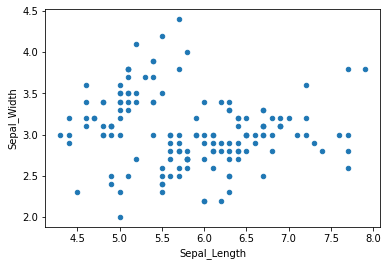

In [161]:
df.plot.scatter(x = 'Sepal_Length', y = 'Sepal_Width')

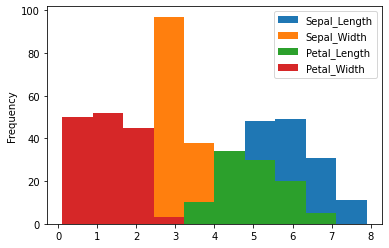

In [164]:
df.plot.hist()

### (9) Combine Data Sets

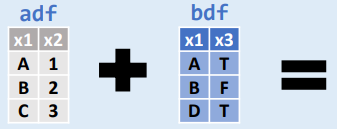

In [167]:
adf = pd.DataFrame(
    {"x1":['A', 'B', 'C'], 
     "x2":[1, 2, 3]
    }
)
 
bdf = pd.DataFrame(
    {"x1":['A', 'B', 'D'], 
     "x3":['T', 'F', 'T']
    }
)

#### (9-1) Standard Joins

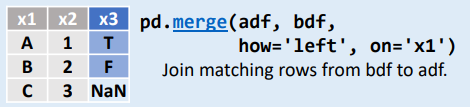

In [171]:
pd.merge(adf, bdf, how = 'left', on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


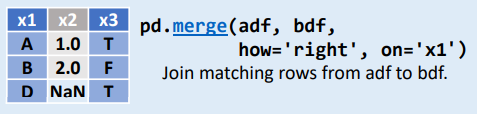

In [172]:
# Join matching rows from adf to bdf 
pd.merge(adf, bdf, how = 'right', on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


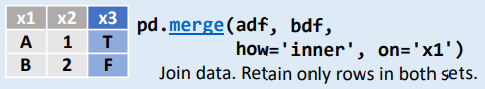

In [173]:
## Join data. Retain only rows in both sets. 
pd.merge(adf, bdf, how = 'inner', on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


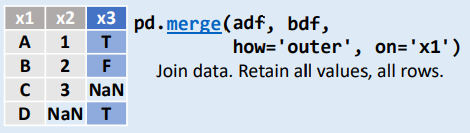

In [174]:
## Join  data. Retain all values, all row 
pd.merge(adf, bdf, how = 'outer', on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


#### (9-2) Filter Joins

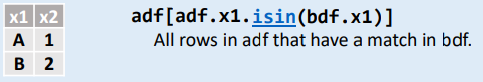

In [175]:
## All rows in adf that have a match in bdf
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


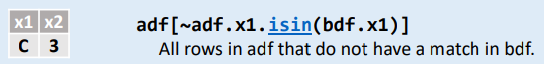

In [176]:
## All rows in adf that do not have a match in bdf. 
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


#### (9-3) Set-like Operations 

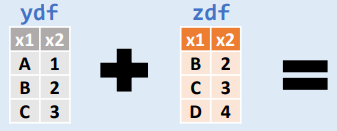

In [177]:
ydf = pd.DataFrame(
    {"x1":['A', 'B', 'C'], 
     "x2":[1, 2, 3]
    }
)
 
zdf = pd.DataFrame(
    {"x1":['B', 'C', 'D'], 
     "x2":[2, 3, 4]
    }
)

In [178]:
## Rows that appear in both ydf and zdf (Intersection).
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [179]:
## Rows that appear in either or both ydf and zdf (Union).
pd.merge(ydf, zdf, how = 'outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [180]:
## Rows that appear in ydf but not zdf (Setdiff).(1/3)
pd.merge(ydf, zdf, how = 'outer', indicator = True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [182]:
## Rows that appear in ydf but not zdf (Setdiff).(2/3)
pd.merge(ydf, zdf, how = 'outer', indicator = True).query('_merge == "left_only"')

,x1,x2,_merge
0,A,1,left_only


In [183]:
## Rows that appear in ydf but not zdf (Setdiff).(3/3)

pd.merge(ydf, zdf, how = 'outer', indicator = True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


### 연습 문제
1. Load a CSV file containing student grades, and calculate the mean, median, and mode for each subject.

2. Given a dataset containing information on university admissions, determine the acceptance rate, and the number of students accepted from each state.

3. Load a dataset containing information on student attendance in a class, and create a histogram to visualize the distribution of attendance.

4. Load a dataset containing information on university courses, and use the pandas module to create a pivot table that shows the number of students enrolled in each course, broken down by gender.

5. Given a dataset containing information on university housing, use the pandas module to identify the most popular residence hall and the average rent for each room type.

6. Load a dataset containing information on student performance in a class, and use the pandas module to create a scatter plot that shows the relationship between the students' final exam scores and their homework scores.

7. Given a dataset containing information on university faculty, use the pandas module to calculate the average salary of male and female faculty members, and determine whether there is a significant gender pay gap.

8. Load a dataset containing information on student majors, and use the pandas module to identify the most common majors and the average starting salaries for each major.

9. Given a dataset containing information on university athletics, use the pandas module to create a bar chart that shows the number of student-athletes in each sport.

10. Load a dataset containing information on student clubs and organizations, and use the pandas module to identify the most popular clubs and the average number of members per club.

---

